In [104]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay, roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab/datasets/Titanic-Dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
mode_Embarked = df['Embarked'].mode()[0]
print(mode_Embarked)


S


In [6]:
df['Embarked'] = df[['Embarked']].fillna(mode_Embarked)
df['Age'] = df[['Age']].fillna(df['Age'].median())
df['Sex'] = df['Sex'].map({'male':1, 'female':0})


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [8]:
encoder = OneHotEncoder(sparse_output=False)


In [9]:
encoded_Embarked = encoder.fit(df[['Embarked']])

In [10]:
encoded_Embarked = encoder.transform(df[['Embarked']])

In [11]:
encoded_Embarked_df = pd.DataFrame(encoded_Embarked, columns=encoder.get_feature_names_out())

In [12]:
encoded_Embarked_df

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [13]:


X = pd.concat([df[['Age', 'Sex', 'Pclass']], encoded_Embarked_df], axis = 1)

In [14]:


X.head()

,Age,Sex,Pclass,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,3,0.0,0.0,1.0
1,38.0,0,1,1.0,0.0,0.0
2,26.0,0,3,0.0,0.0,1.0
3,35.0,0,1,0.0,0.0,1.0
4,35.0,1,3,0.0,0.0,1.0


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X.values, df[['Survived']].values, test_size = 0.2, random_state = 42, shuffle = True)

In [16]:
model = DecisionTreeClassifier(max_depth = 3)

In [17]:
model

DecisionTreeClassifier(max_depth=3)

In [18]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [19]:
y_pred = model.predict(x_test)

In [20]:
y_test_1d = y_test.ravel()
y_pred_1d = y_pred.ravel()
tp = sum((y_test_1d == 1) & (y_pred_1d == 1))
tn = sum((y_test_1d == 1) & (y_pred_1d == 0))
fp = sum((y_test_1d == 0) & (y_pred_1d == 1))
fn = sum((y_test_1d == 0) & (y_pred_1d == 0))
print(f'tp = {tp}\ntn = {tn}\nfp = {fp}\nfn = {fn}')

tp = 48
tn = 26
fp = 10
fn = 95


In [21]:
print(f'lib_method: {accuracy_score(y_test, y_pred):.3f}\nhand_method: {(tp + fn)/(tp + tn + fp + fn):.3f}')

lib_method: 0.799
hand_method: 0.799


In [22]:
print(f'lib_method: {precision_score(y_test, y_pred):.3f}\nhand_mathod: {tp/(tp + fp):.3f}')

lib_method: 0.828
hand_mathod: 0.828


In [23]:
print(f'lib_method: {recall_score(y_test, y_pred):.3f}\nhand_mathod: {tp/(tp + fn):.3f}')

lib_method: 0.649
hand_mathod: 0.336


In [24]:
print(f'lib_method: {f1_score(y_test, y_pred):.3f}\nhand_mathod: {2 * precision_score(y_test, y_pred) * recall_score(y_test, y_pred) / (precision_score(y_test, y_pred) + recall_score(y_test, y_pred)):.3f}')

lib_method: 0.727
hand_mathod: 0.727


In [25]:
arr1 = y_test == 1
arr1.shape

(179, 1)

In [26]:
arr = (y_test.ravel() == 1) & (y_pred.ravel() == 1)
arr.shape

(179,)

In [35]:
def entropy(counts):
  probs = counts / counts.sum()
  probs = probs[probs > 0]
  return -np.sum(probs * np.log2(probs))

In [55]:
counts = np.array([342, 549])
print('Энтропия:', entropy(counts))

Энтропия: 0.9607079018756469


In [27]:
array =np.array([[2, 3], [8, 2]])

In [49]:
arr = np.array([5, 8])

In [50]:
arr

array([5, 8])

In [51]:
entropy(arr)

np.float64(0.9612366047228759)

In [28]:
np.sum(array)

np.int64(15)

In [30]:
np.sum(array, axis = 1)

array([ 5, 10])

In [32]:
np.sum(array, axis = 1) / np.sum(array)

array([0.33333333, 0.66666667])

In [33]:
array.sum()

np.int64(15)

In [34]:
array.sum(axis = 1)

array([ 5, 10])

In [72]:
def information_gain(parent_counts, splits_counts):
  parent_entropy = entropy(parent_counts)
  total = sum(sum(i) for i in splits_counts)
  return parent_entropy - sum(sum(split)/ total * entropy(split) for split in splits_counts)
  # splits_counts = [[x1, y1], [z1, k1]]
  # w1 = count1 / sum_counts(w1 + w2)
  # parent_entropy - (w1*entropy1 + w2*entropy2)

In [73]:
sum([sum(i) for i in splits])

np.int64(891)

In [74]:
parent = np.array([342, 549])
splits = [np.array([109, 468]), np.array([233, 81])]
print('IG:', information_gain(parent, splits))  # ~0.216

IG: 0.2176601066606142


In [58]:
parent_entropy = entropy(parent)
parent_entropy

np.float64(0.9607079018756469)

In [59]:
splits_counts = splits

In [60]:
weights_split = np.sum(splits_counts, axis = 1) / splits_counts.sum()

In [61]:
weights_split

array([0.64758698, 0.35241302])

In [62]:
entropy(splits_counts)


np.float64(1.6792524384648848)

In [98]:
survived_men = df[df['Sex'] == 1]['Survived'].sum()
unsurvived_men = df[df['Sex'] == 1]['Survived'].count() - survived_men
unsurvived_women = df[df['Sex'] == 0]['Survived'].count() - survived_men
survived_women = df[df['Sex'] == 0]['Survived'].sum()
parent = np.array([df[df['Survived'] == 1]['Survived'].count(), df[df['Survived'] == 0]['Survived'].count()])
split_counts = np.array([[survived_men, unsurvived_men], [survived_women, unsurvived_women]])
print(split_counts)
print(parent)

[[109 468]
 [233 205]]
[342 549]


In [86]:
df[df['Survived'] == 1]['Survived'].count()

np.int64(342)

In [89]:
type(df[df['Survived'] == 1]['Survived'].count())

numpy.int64

In [92]:
type(df[df['Survived'] == 0]['Survived'].count())

numpy.int64

In [99]:
print('IG:', information_gain(parent, splits))

IG: 0.2176601066606142


In [101]:
cm = confusion_matrix(y_test, y_pred)

In [102]:
cm

array([[95, 10],
       [26, 48]])

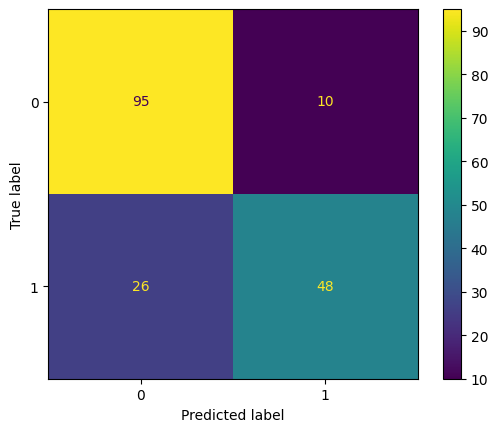

In [107]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

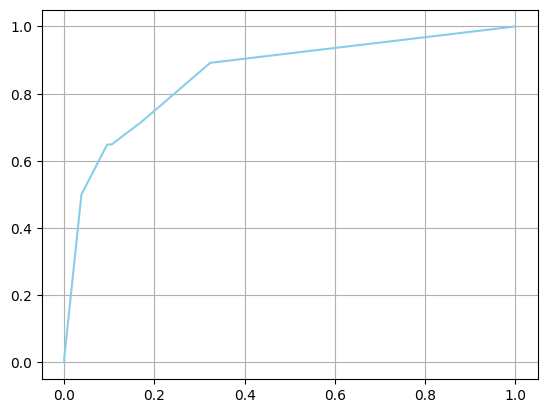

In [109]:
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, c = 'skyblue')
plt.grid()
plt.show()

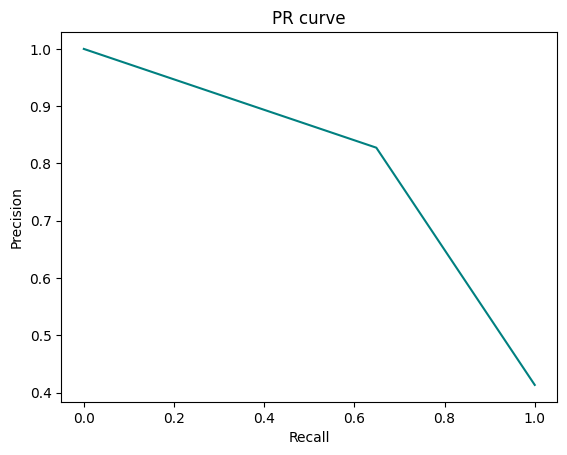

In [115]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, c = 'teal')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [116]:
from sklearn.model_selection import GridSearchCV
grid_param = {'max_depth' : [2, 3, 5, 10],
              'min_samples_leaf': [2, 3, 5, 10]}
grid = GridSearchCV(model, param_grid = grid_param, cv = 5, scoring = 'accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [2, 3, 5, 10]},
             scoring='accuracy')

In [120]:
print(f'Best params: {grid.best_params_}\nBest score: {grid.best_score_}')

Best params: {'max_depth': 3, 'min_samples_leaf': 2}
Best score: 0.8244558258642766


In [130]:
X.columns[:]

Index(['Age', 'Sex', 'Pclass', 'Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype='object')

In [121]:
best_model = DecisionTreeClassifier(max_depth = 3, min_samples_leaf=2).fit(x_train, y_train)

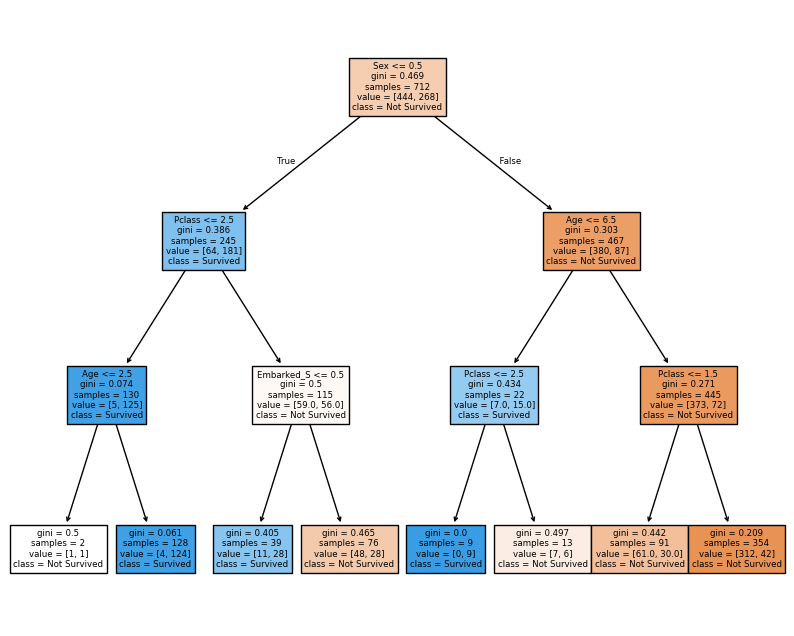

In [132]:
plt.figure(figsize = (10, 8))
plot_tree(best_model, filled = True, class_names=['Not Survived', 'Survived'], feature_names=X.columns)
plt.show()

In [155]:
y_pred_default = best_model.predict(x_test)
y_prob = best_model.predict_proba(x_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
f1_score = 2 * precision * recall / (precision + recall)
best_idx = np.argmax(f1_score)
y_pred_custom = (y_prob > thresholds[best_idx-1]).astype(int)

In [150]:
thresholds[best_idx]

np.float64(0.32967032967032966)

In [156]:
print("Default:", confusion_matrix(y_test, y_pred_default))
print("Custom :", confusion_matrix(y_test, y_pred_custom))

Default: [[95 10]
 [26 48]]
Custom : [[71 34]
 [ 8 66]]


In [157]:
accuracy_score(y_test, y_pred_default)

0.7988826815642458

In [158]:
accuracy_score(y_test, y_pred_custom)

0.7653631284916201